DIP Techniques

In [2]:
import cv2
import numpy as np

In [3]:
original_image = cv2.imread('fer2013/train/angry/im0.png')

(-0.5, 95.5, 95.5, -0.5)

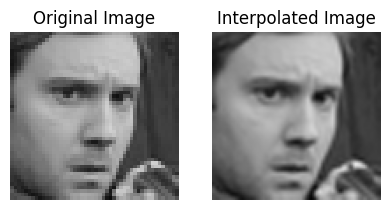

In [4]:
from matplotlib import pyplot  as plt

# Define scale factors
scale_x = 4
scale_y = 4

# Determine new dimensions
new_width = 96
new_height = 96

# Perform bicubic interpolation
interpolated_image = cv2.resize(original_image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)

# Display results using matplotlib
plt.figure(figsize=(10, 8))

plt.subplot(141)
plt.title('Original Image')
plt.imshow(original_image, cmap='gray')
plt.axis('off')

plt.subplot(142)
plt.title('Interpolated Image')
plt.imshow(interpolated_image, cmap='gray')
plt.axis('off')


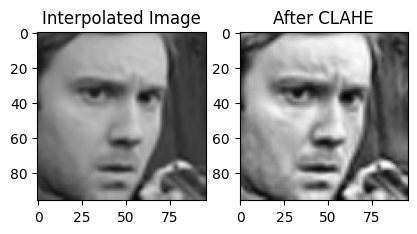

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'interpolated_image' is the image you wish to process
# Convert the image to grayscale
gray_image = cv2.cvtColor(interpolated_image, cv2.COLOR_BGR2GRAY)

def apply_clahe(image):
    # Create a CLAHE object (Arguments are optional)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    # Apply CLAHE
    clahe_image = clahe.apply(image)
    return clahe_image

clahe_image = apply_clahe(gray_image)

# Display results using matplotlib
plt.figure(figsize=(10, 8))
plt.subplot(141)
plt.imshow(interpolated_image, cmap='gray')
plt.title('Interpolated Image')
plt.subplot(142)
plt.imshow(clahe_image, cmap='gray')
plt.title('After CLAHE')
plt.show()


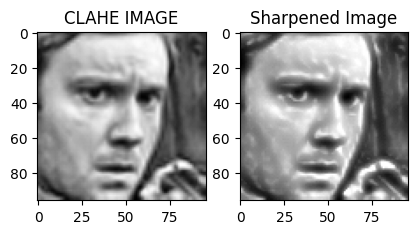

In [11]:
def sharpen_image(image):
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(image, (3, 3), 0)
    # Apply Laplacian filter
    laplacian = cv2.Laplacian(blurred, cv2.CV_64F)
    # Convert Laplacian result to the same data type as the original image
    laplacian = cv2.convertScaleAbs(laplacian)
    # Add the Laplacian image to the original image to enhance edges
    sharpened = cv2.addWeighted(image, 1.0, laplacian, 1.0, 0)
    return sharpened
sharpened_image=sharpen_image(clahe_image)

# Display results using matplotlib
plt.figure(figsize=(10, 8))
plt.subplot(141)
plt.imshow(clahe_image, cmap='gray')
plt.title('CLAHE IMAGE')
plt.subplot(142)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.show()

Other Techniques

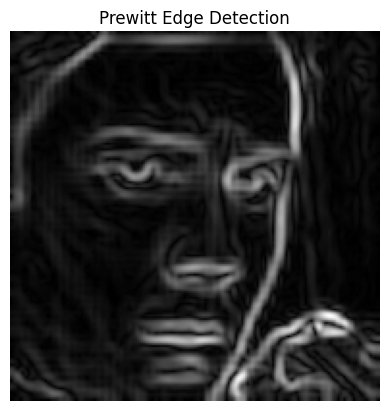

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Interpolated image
image = interpolated_image  # Use the given image data

# Validate the image
if image is None or image.size == 0:
    raise ValueError("The interpolated image data is empty.")

# Define Prewitt kernels for edge detection in x and y directions
kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=int)
kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)

# Apply Prewitt operator for edge detection with appropriate data type
prewitt_x = cv2.filter2D(image, cv2.CV_32F, kernelx)  # Convert to float32
prewitt_y = cv2.filter2D(image, cv2.CV_32F, kernely)  # Convert to float32

# Compute the magnitude of gradients
prewitt_edges = np.sqrt(prewitt_x ** 2 + prewitt_y ** 2)

# Replace NaN and infinite values
prewitt_edges[np.isnan(prewitt_edges)] = 0
prewitt_edges[np.isinf(prewitt_edges)] = 0

# Normalize to ensure values are within 0-255 range
prewitt_edges_normalized = cv2.normalize(prewitt_edges, None, 0, 255, cv2.NORM_MINMAX)

# Convert to uint8 for visualization
prewitt_edges_uint8 = cv2.convertScaleAbs(prewitt_edges_normalized)

# Plot and visualize the Prewitt edge-detected image
plt.imshow(prewitt_edges_uint8, cmap='gray')
plt.title("Prewitt Edge Detection")
plt.axis("off")
plt.show()


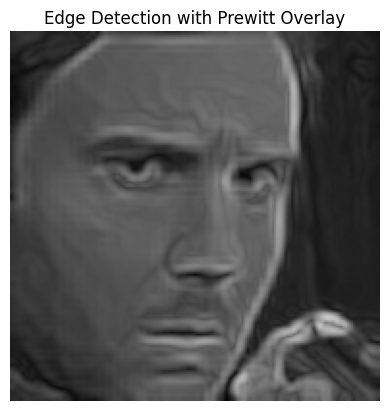

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the new image for edge detection
image = interpolated_image

# Validate the image
if image is None or image.size == 0:
    raise ValueError("Failed to load the image. Please check the path and file.")

# Define Prewitt kernels for edge detection in x and y directions
kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=int)
kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)

# Apply Prewitt operator for edge detection
prewitt_x = cv2.filter2D(image, cv2.CV_32F, kernelx)  # Gradient in the x direction
prewitt_y = cv2.filter2D(image, cv2.CV_32F, kernely)  # Gradient in the y direction

# Compute the magnitude of gradients for edge detection
prewitt_edges = np.sqrt(prewitt_x ** 2 + prewitt_y ** 2)

# Normalize the edges to a visible range
prewitt_edges_normalized = cv2.normalize(prewitt_edges, None, 0, 255, cv2.NORM_MINMAX)

# Create an overlay to visualize edges on top of the original image
overlay = cv2.addWeighted(image.astype(np.float32), 0.5, prewitt_edges_normalized.astype(np.float32), 0.5, 0)

# Convert to uint8 for visualization
overlay_uint8 = cv2.convertScaleAbs(overlay)

# Display the overlay with edges on top of the original image
plt.imshow(overlay_uint8, cmap='gray')
plt.title("Edge Detection with Prewitt Overlay")
plt.axis("off")
plt.show()  # Visualize the result with edges overlaid on the original image


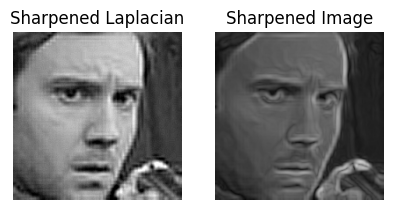

In [18]:
# Display results using matplotlib
plt.figure(figsize=(10, 8))

plt.subplot(141)
plt.title('Sharpened Laplacian')
plt.imshow(sharpened_image, cmap='gray')
plt.axis('off')

plt.subplot(142)
plt.title('Sharpened Image')
plt.imshow(overlay_uint8, cmap='gray')
plt.axis('off')

plt.show()



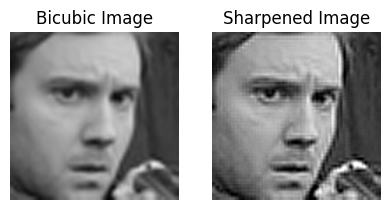

In [16]:
import cv2
import numpy as np

# Define the sharpening kernel
sharpening_kernel = np.array([[-1, -1, -1],
                            [-1,  9, -1],
                            [-1, -1, -1]])

# Apply the sharpening kernel
sharpened_image = cv2.filter2D(interpolated_image, -1, sharpening_kernel)

# Display results using matplotlib
plt.figure(figsize=(10, 8))

plt.subplot(141)
plt.title('Bicubic Image')
plt.imshow(interpolated_image, cmap='gray')
plt.axis('off')

plt.subplot(142)
plt.title('Sharpened Image')
plt.imshow(sharpened_image, cmap='gray')
plt.axis('off')

plt.show()


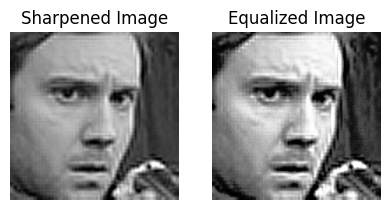

In [6]:
# Convert the original image to grayscale
gray_image = cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2GRAY)

# Perform histogram equalization
equalized_image = cv2.equalizeHist(gray_image)

# Display results using matplotlib
plt.figure(figsize=(10, 8))

plt.subplot(141)
plt.title('Sharpened Image')
plt.imshow(sharpened_image, cmap='gray')
plt.axis('off')

plt.subplot(142)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.show()

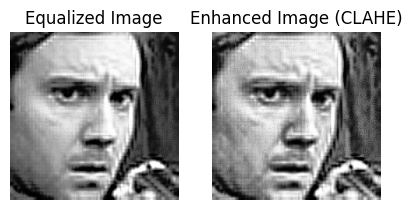

In [8]:
# Create a CLAHE object (Arguments are optional)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE
enhanced_image = clahe.apply(equalized_image)

# Display results
plt.figure(figsize=(10, 8))

plt.subplot(141)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

plt.subplot(142)
plt.title('Enhanced Image (CLAHE)')
plt.imshow(enhanced_image, cmap='gray')
plt.axis('off')

plt.show()


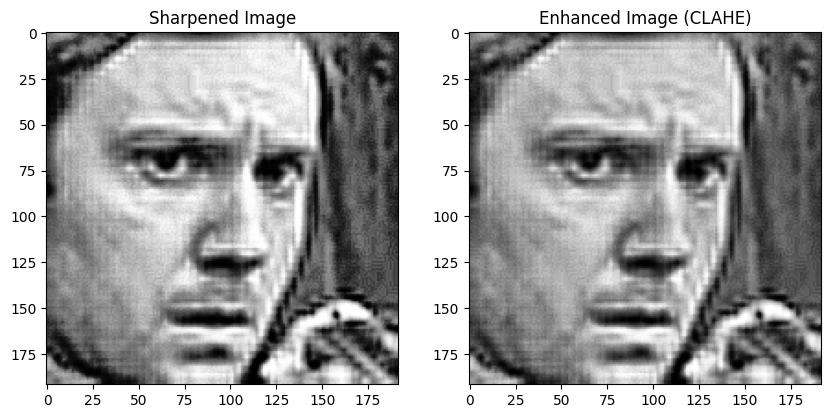

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a CLAHE object with a specified clip limit and tile grid size
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Convert the image to grayscale before applying CLAHE
sharpened_image_gray = cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2GRAY)

# Apply CLAHE to the grayscale image
enhanced_image1 = clahe.apply(sharpened_image_gray)

# Display results
plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.title("Sharpened Image")
plt.imshow(enhanced_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Enhanced Image (CLAHE)")
plt.imshow(enhanced_image1, cmap='gray')
plt.show()


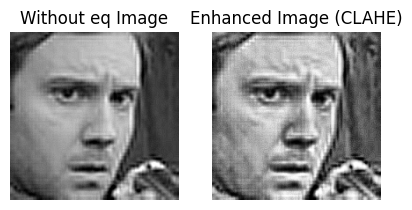

In [14]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE
# Convert the image to grayscale before applying CLAHE
sharpened_image_gray = cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2GRAY)
enhanced_image1 = clahe.apply(sharpened_image_gray)

# Display results
plt.figure(figsize=(10, 8))

plt.subplot(141)
plt.title('Without eq Image')
plt.imshow(sharpened_image, cmap='gray')
plt.axis('off')

plt.subplot(142)
plt.title('Enhanced Image (CLAHE)')
plt.imshow(enhanced_image1, cmap='gray')
plt.axis('off')

plt.show()
